# PCA intuition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

np.random.seed(42)

# Generate data
num_points = 40
n_frames_per_angle = 2 # how many frames per angle. The lower - the faster.
X = np.random.randn(num_points, 2)
X = X @ np.array([[1.6, 0.0], [0.0, 0.4]])

# Normalize data
center_point = [0., 0.]

# PCA components
_, v = np.linalg.eig(X.T @ X)
v_main = v.T[0]

# Set up the grid
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1])  # Two rows, one column, with the first row 3 times the height of the second

fig = plt.figure(figsize=(5, 6))  # Adjust the total figure size as necessary

ax = plt.subplot(gs[0])  # The first subplot
ax2 = plt.subplot(gs[1])  # The second subplot

scatter = ax.scatter(X[:,0], X[:,1], color='b', label="Data")

direction_line, = ax.plot([], [], 'k')
ax.plot([-v_main[0]*3 + center_point[0],
                             v_main[0]*3 + center_point[0]],
                            [-v_main[1]*3 + center_point[1],
                            v_main[1]*3 + center_point[1]], label="First singular vector of X")

projection_points, = ax.plot([], [], 'ro', markersize=5, label="Projections")
projection_lines = [ax.plot([], [], 'r')[0] for _ in range(num_points)]

direction_line2, = ax2.plot([-3.5, 3.5], [0,0], 'k')
projections, = ax2.plot([],[], 'ro', markersize=7)

def init():
    ax.axis('equal')
    ax.grid(linestyle=":")
    ax.scatter(x=center_point[0], y=center_point[1], c='k')
    ax.legend(loc="upper right")
    ax.set_title("PCA")
    # ax.text(0.94, 0.945, "@fminxyz", transform=fig.transFigure,
    #         ha="right", va="top", fontsize=10, alpha=0.5)

    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-1, 1)
    w = np.array([0, 0])
    ax2.grid(linestyle=":")
    ax2.set_title("Projections on the First Principal Component\n"
                  f"Variance of the projections: {np.linalg.norm(X@w)**2:.1f}")
    fig.tight_layout()
    return scatter, direction_line, projection_points, projection_lines


def update(frame):
    ax.set_xlim(-3.5+center_point[0], 3.5+center_point[0])
    ax.set_ylim(-3.5+center_point[1], 3.5+center_point[1])
    alpha = frame/n_frames_per_angle
    w = np.array([np.cos(np.radians(alpha)), np.sin(np.radians(alpha))])
    z = X @ w.reshape(-1, 1) @ w.reshape(1, -1) + center_point

    for i in range(num_points):
        projection_lines[i].set_data([X[i, 0], z[i, 0]], [X[i, 1], z[i, 1]])
        projection_lines[i].set_color('r')

    projection_points.set_data(z[:, 0], z[:, 1])
    # distances = pdist(z)
    # max_distance = np.max(distances)
    # projection_points.set_label(f"Max Distance: {max_distance:.2f}")

    direction_line.set_data([-w[0]*3 + center_point[0],
                             w[0]*3 + center_point[0]],
                            [-w[1]*3 + center_point[1],
                            w[1]*3 + center_point[1]])

    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-1, 1)
    projections.set_data(X@w, np.zeros(len(X@w)))
    ax2.set_title("Projections on the First Principal Component\n"
                  f"Variance of the projections: {np.linalg.norm(X@w)**2:.1f}")

    return direction_line, projection_points, projection_lines

ani = animation.FuncAnimation(fig, update,
                              frames=np.arange(0, n_frames_per_angle*180),
                              interval=1000/60, # 60 fps
                              init_func=init)

plt.close()
from IPython import display
html = display.HTML(ani.to_html5_video())
display.display(html)

# # Uncomment to save to the file
# ani.save("PCA_animation.mp4", writer='ffmpeg', fps=60, dpi=300)

## Exercise: what's wrong (1)?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

np.random.seed(42)

# Generate data
num_points = 40
n_frames_per_angle = 0.5 # how many frames per angle. The lower - the faster.
X = np.random.randn(num_points, 2)
X = X @ np.linalg.cholesky(np.array([[1, 0.6], [0.6, 0.6]]))
X = X - np.ones(2)

# Normalize data
center_point = [0., 0.]

# PCA components
_, v = np.linalg.eig(X.T @ X)
v_main = v.T[0]

# Set up the grid
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1])  # Two rows, one column, with the first row 3 times the height of the second

fig = plt.figure(figsize=(5, 6))  # Adjust the total figure size as necessary

ax = plt.subplot(gs[0])  # The first subplot
ax2 = plt.subplot(gs[1])  # The second subplot

scatter = ax.scatter(X[:,0], X[:,1], color='b', label="Data")

direction_line, = ax.plot([], [], 'k')
ax.plot([-v_main[0]*3 + center_point[0],
                             v_main[0]*3 + center_point[0]],
                            [-v_main[1]*3 + center_point[1],
                            v_main[1]*3 + center_point[1]], label="First singular vector of X")

projection_points, = ax.plot([], [], 'ro', markersize=5, label="Projections")
projection_lines = [ax.plot([], [], 'r')[0] for _ in range(num_points)]

direction_line2, = ax2.plot([-3.5, 3.5], [0,0], 'k')
projections, = ax2.plot([],[], 'ro', markersize=7)

def init():
    ax.axis('equal')
    ax.grid(linestyle=":")
    ax.scatter(x=center_point[0], y=center_point[1], c='k')
    ax.legend(loc="upper right")
    ax.set_title("PCA")
    # ax.text(0.94, 0.945, "@fminxyz", transform=fig.transFigure,
    #         ha="right", va="top", fontsize=10, alpha=0.5)

    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-1, 1)
    w = np.array([0, 0])
    ax2.grid(linestyle=":")
    ax2.set_title("Projections on the First Principal Component\n"
                  f"Variance of the projections: {np.linalg.norm(X@w)**2:.1f}")
    fig.tight_layout()
    return scatter, direction_line, projection_points, projection_lines


def update(frame):
    ax.set_xlim(-3.5+center_point[0], 3.5+center_point[0])
    ax.set_ylim(-3.5+center_point[1], 3.5+center_point[1])
    alpha = frame/n_frames_per_angle
    w = np.array([np.cos(np.radians(alpha)), np.sin(np.radians(alpha))])
    z = X @ w.reshape(-1, 1) @ w.reshape(1, -1)

    for i in range(num_points):
        projection_lines[i].set_data([X[i, 0], z[i, 0]], [X[i, 1], z[i, 1]])
        projection_lines[i].set_color('r')

    projection_points.set_data(z[:, 0], z[:, 1])
    # distances = pdist(z)
    # max_distance = np.max(distances)
    # projection_points.set_label(f"Max Distance: {max_distance:.2f}")

    direction_line.set_data([-w[0]*3 + center_point[0],
                             w[0]*3 + center_point[0]],
                            [-w[1]*3 + center_point[1],
                            w[1]*3 + center_point[1]])

    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-1, 1)
    projections.set_data(X@w, np.zeros(len(X@w)))
    ax2.set_title("Projections on the First Principal Component\n"
                  f"Variance of the projections: {np.linalg.norm(X@w)**2:.1f}")

    return direction_line, projection_points, projection_lines

ani = animation.FuncAnimation(fig, update,
                              frames=np.arange(0, n_frames_per_angle*180),
                              interval=1000/60, # 60 fps
                              init_func=init)

plt.close()
from IPython import display
html = display.HTML(ani.to_html5_video())
display.display(html)

# # Uncomment to save to the file
# ani.save("PCA_animation.mp4", writer='ffmpeg', fps=60, dpi=300)

## Exercise: what's wrong (2)?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

np.random.seed(42)

# Generate data
num_points = 30
n_frames_per_angle = 1 # how many frames per angle. The lower - the faster.
X = np.random.randn(num_points, 2)

# Normalize data
center_point = [0, 0]

# PCA components
eigs, v = np.linalg.eig(X.T @ X)
v_main = v.T[0]

# Set up the grid
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1])  # Two rows, one column, with the first row 3 times the height of the second

fig = plt.figure(figsize=(5, 6))  # Adjust the total figure size as necessary

ax = plt.subplot(gs[0])  # The first subplot
ax2 = plt.subplot(gs[1])  # The second subplot

scatter = ax.scatter(X[:,0], X[:,1], color='b', label="Data")

direction_line, = ax.plot([], [], 'k')

ax.plot([-v_main[0]*3 + center_point[0],
                             v_main[0]*3 + center_point[0]],
                            [-v_main[1]*3 + center_point[1],
                            v_main[1]*3 + center_point[1]], label="First singular vector of X")

projection_points, = ax.plot([], [], 'ro', markersize=5, label="Projections")
projection_lines = [ax.plot([], [], 'r')[0] for _ in range(num_points)]

direction_line2, = ax2.plot([-3.5, 3.5], [0,0], 'k')
projections, = ax2.plot([],[], 'ro', markersize=7)

def init():
    ax.axis('equal')
    ax.grid(linestyle=":")
    ax.scatter(x=center_point[0], y=center_point[1], c='k')
    ax.legend(loc="upper right")
    ax.set_title("PCA")
    # ax.text(0.94, 0.945, "@fminxyz", transform=fig.transFigure,
    #         ha="right", va="top", fontsize=10, alpha=0.5)

    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-1, 1)
    w = np.array([0, 0])
    ax2.grid(linestyle=":")
    ax2.set_title("Projections on the First Principal Component\n"
                  f"Variance of the projections: {np.linalg.norm(X@w)**2:.1f}")
    fig.tight_layout()
    return scatter, direction_line, projection_points, projection_lines


def update(frame):
    ax.set_xlim(-3.5+center_point[0], 3.5+center_point[0])
    ax.set_ylim(-3.5+center_point[1], 3.5+center_point[1])
    alpha = frame/n_frames_per_angle
    w = np.array([np.cos(np.radians(alpha)), np.sin(np.radians(alpha))])
    z = X @ w.reshape(-1, 1) @ w.reshape(1, -1) + center_point

    for i in range(num_points):
        projection_lines[i].set_data([X[i, 0], z[i, 0]], [X[i, 1], z[i, 1]])
        projection_lines[i].set_color('r')

    projection_points.set_data(z[:, 0], z[:, 1])
    # distances = pdist(z)
    # max_distance = np.max(distances)
    # projection_points.set_label(f"Max Distance: {max_distance:.2f}")

    direction_line.set_data([-w[0]*3 + center_point[0],
                             w[0]*3 + center_point[0]],
                            [-w[1]*3 + center_point[1],
                            w[1]*3 + center_point[1]])

    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-1, 1)
    projections.set_data(X@w, np.zeros(len(X@w)))
    ax2.set_title("Projections on the First Principal Component\n"
                  f"Variance of the projections: {np.linalg.norm(X@w)**2:.1f}")

    return direction_line, projection_points, projection_lines

ani = animation.FuncAnimation(fig, update,
                              frames=np.arange(0, n_frames_per_angle*180),
                              interval=1000/60, # 60 fps
                              init_func=init)

plt.close()
from IPython import display
html = display.HTML(ani.to_html5_video())
display.display(html)

# # Uncomment to save to the file
# ani.save("PCA_animation.mp4", writer='ffmpeg', fps=60, dpi=300)

## Exercise: what's "wrong" (3)?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

np.random.seed(42)

# Generate data
num_points = 60
n_frames_per_angle = 0.5 # how many frames per angle. The lower - the faster.
X_1 = np.random.randn(int(num_points/2), 2)
X_1 = X_1 @ np.array([[1.4, 0.0], [0.0, 0.2]])

X_2 = np.random.randn(int(num_points/2), 2)
X_2 = X_2 @ np.array([[1.4, 0.0], [0.0, 0.2]])
X_2 = X_2 + np.array([0, 2])

X = np.vstack([X_1, X_2])

# Normalize data
center_point = np.mean(X, axis=0)
X_std = X - center_point

# PCA components
_, v = np.linalg.eig(X_std.T @ X_std)
v_main = v.T[0]

# Set up the grid
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1])  # Two rows, one column, with the first row 3 times the height of the second

fig = plt.figure(figsize=(5, 6))  # Adjust the total figure size as necessary

ax = plt.subplot(gs[0])  # The first subplot
ax2 = plt.subplot(gs[1])  # The second subplot

scatter = ax.scatter(X[:,0], X[:,1], color='b', label="Data")

direction_line, = ax.plot([], [], 'k')
ax.plot([-v_main[0]*3 + center_point[0],
                             v_main[0]*3 + center_point[0]],
                            [-v_main[1]*3 + center_point[1],
                            v_main[1]*3 + center_point[1]], label="First eigenvector of X")

projection_points, = ax.plot([], [], 'ro', markersize=5, label="Projections")
projection_lines = [ax.plot([], [], 'r')[0] for _ in range(num_points)]

direction_line2, = ax2.plot([-3.5, 3.5], [0,0], 'k')
projections, = ax2.plot([],[], 'ro', markersize=7)

def init():
    ax.axis('equal')
    ax.grid(linestyle=":")
    ax.scatter(x=center_point[0], y=center_point[1], c='k')
    ax.legend(loc="upper right")
    ax.set_title("PCA")
    # ax.text(0.94, 0.945, "@fminxyz", transform=fig.transFigure,
    #         ha="right", va="top", fontsize=10, alpha=0.5)

    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-1, 1)
    w = np.array([0, 0])
    ax2.grid(linestyle=":")
    ax2.set_title("Projections on the First Principal Component\n"
                  f"Variance of the projections: {np.linalg.norm(X_std@w)**2:.1f}")
    fig.tight_layout()
    return scatter, direction_line, projection_points, projection_lines


def update(frame):
    ax.set_xlim(-3.5+center_point[0], 3.5+center_point[0])
    ax.set_ylim(-3.5+center_point[1], 3.5+center_point[1])
    alpha = frame/n_frames_per_angle
    w = np.array([np.cos(np.radians(alpha)), np.sin(np.radians(alpha))])
    z = X_std @ w.reshape(-1, 1) @ w.reshape(1, -1) + center_point

    for i in range(num_points):
        projection_lines[i].set_data([X[i, 0], z[i, 0]], [X[i, 1], z[i, 1]])
        projection_lines[i].set_color('r')

    projection_points.set_data(z[:, 0], z[:, 1])
    # distances = pdist(z)
    # max_distance = np.max(distances)
    # projection_points.set_label(f"Max Distance: {max_distance:.2f}")

    direction_line.set_data([-w[0]*3 + center_point[0],
                             w[0]*3 + center_point[0]],
                            [-w[1]*3 + center_point[1],
                            w[1]*3 + center_point[1]])

    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-1, 1)
    projections.set_data(X_std@w, np.zeros(len(X_std@w)))
    ax2.set_title("Projections on the First Principal Component\n"
                  f"Variance of the projections: {np.linalg.norm(X_std@w)**2:.1f}")

    return direction_line, projection_points, projection_lines

ani = animation.FuncAnimation(fig, update,
                              frames=np.arange(0, n_frames_per_angle*180),
                              interval=1000/60, # 60 fps
                              init_func=init)

plt.close()
from IPython import display
html = display.HTML(ani.to_html5_video())
display.display(html)

# # Uncomment to save to the file
# ani.save("PCA_animation.mp4", writer='ffmpeg', fps=60, dpi=300)

# PCA with Iris

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True, precision=4)

dataset     = load_iris()
A           = dataset['data']
labels      = dataset['target']
classes     = dataset['target_names']
label_names = np.array([classes[label] for label in labels])
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

🤖: Dataset contains 150 points in 4-dimensional space


In [ ]:
print('🌘 Mean value over each dimension before the normalization',np.mean(A, axis = 0))
# Data normalization with zero mean and unit variance
A_std = StandardScaler().fit_transform(A)
print('🌗 Mean value over each dimension after the normalization',np.mean(A_std, axis = 0))

🌘 Mean value over each dimension before the normalization [5.8433 3.0573 3.758  1.1993]
🌗 Mean value over each dimension after the normalization [-0. -0. -0. -0.]


In [ ]:
# Main part
u,s,wh = np.linalg.svd(A_std)
print('🤖Shapes: \n A_std, {}\n u {}\n s {}. Singular values in descending order {} \n wh {}'.format(A_std.shape, u.shape, s.shape,s, wh.shape))

🤖Shapes: 
 A_std, (150, 4)
 u (150, 150)
 s (4,). Singular values in descending order [20.9231 11.7092  4.6919  1.7627] 
 wh (4, 4)


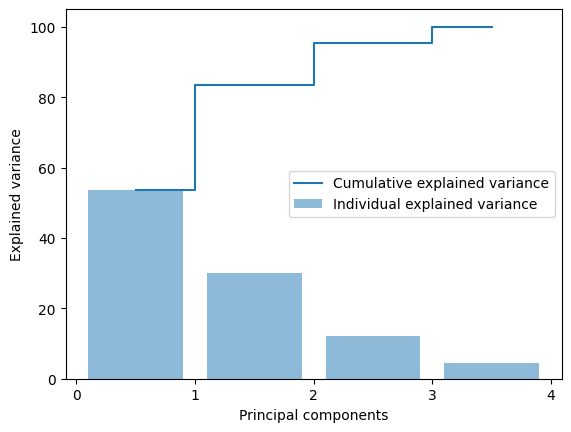

In [ ]:
total_variance = sum(s)
variance_explained = [(i / total_variance)*100 for i in sorted(s, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

xs = [0.5 + i for i in range(A_std.shape[1])]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks(np.arange(A_std.shape[1]+1))
plt.show()

In [ ]:
# Building projection matrix
rank = 2
w = wh.T
projections = u[:,:rank] @ np.diag(s[:rank])

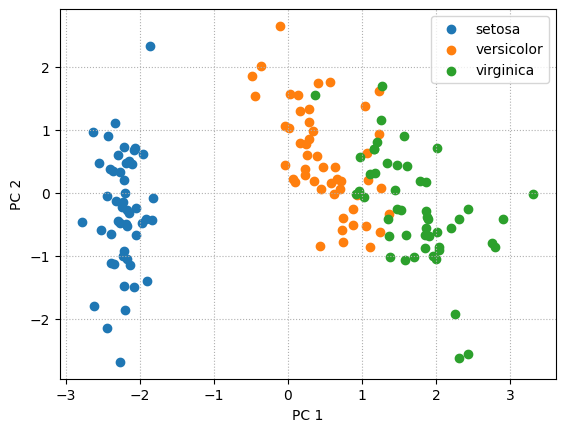

In [ ]:
for label in classes:
    plt.scatter(projections[label_names == label, 0],
                projections[label_names == label, 1],
                label = label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.grid(linestyle=":")
plt.show()
# plt.savefig('pca_pr_iris.svg')

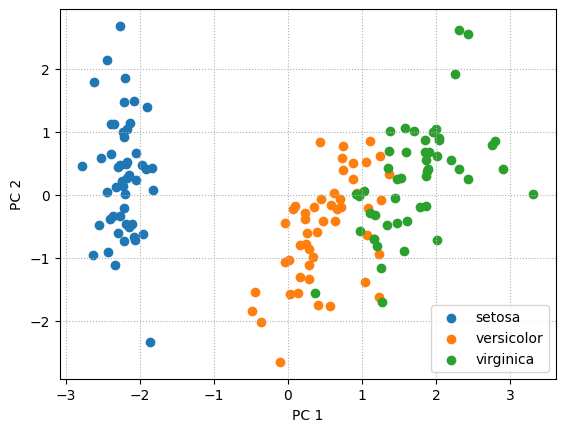

In [ ]:
# Built-in approach
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
projections_sklearn = sklearn_pca.fit_transform(A_std)

for label in classes:
    plt.scatter(projections_sklearn[label_names == label, 0],
                projections_sklearn[label_names == label, 1],
                label = label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.grid(linestyle=":")
plt.show()

In [ ]:
# Time comparison
def svd_projections(A_std):
    u,s,wh = np.linalg.svd(A_std)
    rank = 2
    w = wh.T
    return u[:,:rank] @ np.diag(s[:rank])

print('💎 SVD PCA running time')
%timeit svd_projections
print('💎 sklearn PCA running time')
%timeit sklearn_pca.fit_transform

SVD PCA running time
11.4 ns ± 0.227 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
sklearn PCA running time
42.3 ns ± 0.484 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


# PCA with wine

🤖: Dataset contains 178 points in 13-dimensional space


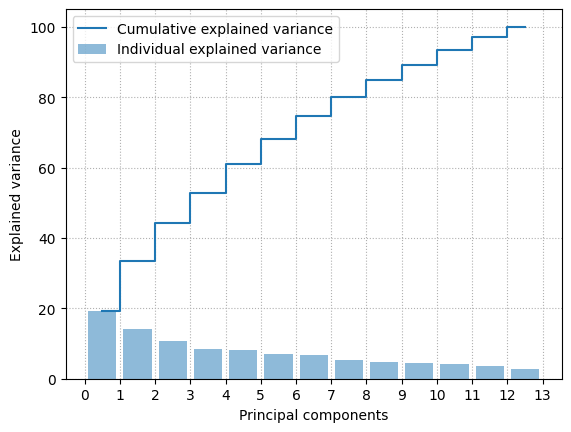

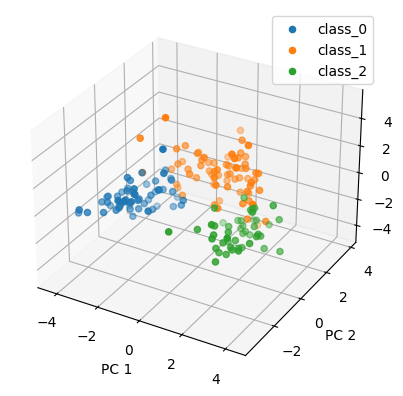

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.datasets import load_wine #lol
from sklearn.preprocessing import StandardScaler

dataset     = load_wine()
A           = dataset['data']
labels      = dataset['target']
classes     = dataset['target_names']
label_names = np.array([classes[label] for label in labels])
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

# Data normalization with zero mean and unit variance
A_std = StandardScaler().fit_transform(A)

u,s,wh = np.linalg.svd(A_std)

total_variance = sum(s)
variance_explained = [(i / total_variance)*100 for i in sorted(s, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)


xs = [0.5 + i for i in range(A_std.shape[1])]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks(np.arange(A_std.shape[1]+1))
plt.grid(linestyle=":")
plt.show()

plt.figure()
rank = 3
projections = u[:,:rank] @ np.diag(s[:rank])
ax = plt.axes(projection="3d")
for label in classes:
    ax.scatter3D(projections[label_names == label, 0],
                projections[label_names == label, 1],
                projections[label_names == label, 2],
                label = label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# plt.zlabel('PC 3')
plt.legend(loc='best')
plt.show()

🤖: Dataset contains 178 points in 13-dimensional space


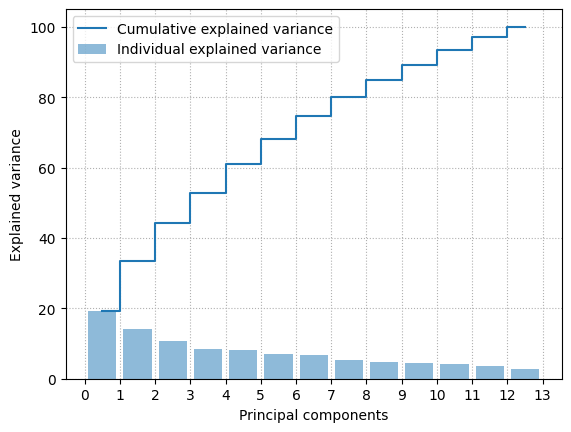

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.express as px
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

dataset     = load_wine()
A           = dataset['data']
labels      = dataset['target']
classes     = dataset['target_names']
label_names = np.array([classes[label] for label in labels])
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

# Data normalization with zero mean and unit variance
A_std = StandardScaler().fit_transform(A)

u, s, wh = np.linalg.svd(A_std)

total_variance = sum(s)
variance_explained = [(i / total_variance)*100 for i in sorted(s, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

xs = [0.5 + i for i in range(A_std.shape[1])]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks(np.arange(A_std.shape[1]+1))
plt.grid(linestyle=":")
plt.show()

rank = 3
projections = u[:,:rank] @ np.diag(s[:rank])
df = pd.DataFrame(projections, columns=['PC1', 'PC2', 'PC3'])
df['label'] = label_names

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='label')
fig.update_traces(marker=dict(size=6),
                  selector=dict(mode='markers'))
fig.show()


# MNIST PCA

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd
import tensorflow as tf

# Load dataset
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

# Flatten images
train_images = train_images.reshape((train_images.shape[0], -1))

# Select 20 random images per class
selected_indices = []
for i in range(10):
    indices = np.where(train_labels == i)[0]
    selected_indices.extend(np.random.choice(indices, 1000, replace=False))
selected_images = train_images[selected_indices]
selected_labels = train_labels[selected_indices]

# Normalize the data
selected_images = selected_images / 255.0

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(selected_images)

# Prepare data for plotting
pc_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pc_df['Label'] = selected_labels
pc_df['Label'] = pc_df['Label'].astype(str)

# Plot
fig = px.scatter(pc_df, x='PC1', y='PC2', color='Label',
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='2D PCA of MNIST')
fig.show()


# MNIST tSNE

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd
import tensorflow as tf
from sklearn.manifold import TSNE

# Load dataset
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

# Flatten images
train_images = train_images.reshape((train_images.shape[0], -1))

# Select 20 random images per class
selected_indices = []
for i in range(10):
    indices = np.where(train_labels == i)[0]
    selected_indices.extend(np.random.choice(indices, 1000, replace=False))
selected_images = train_images[selected_indices]
selected_labels = train_labels[selected_indices]

# Normalize the data
selected_images = selected_images / 255.0

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=40)
tsne_results = tsne.fit_transform(selected_images)

# Prepare data for plotting
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])
tsne_df['Label'] = selected_labels
tsne_df['Label'] = tsne_df['Label'].astype(str)

# Plot
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='Label',
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='2D t-SNE of MNIST')
fig.show()


# MNIST UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd
import tensorflow as tf
import umap

# Load dataset
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

# Flatten images
train_images = train_images.reshape((train_images.shape[0], -1))

# Select 20 random images per class
selected_indices = []
for i in range(10):
    indices = np.where(train_labels == i)[0]
    selected_indices.extend(np.random.choice(indices, 1000, replace=False))
selected_images = train_images[selected_indices]
selected_labels = train_labels[selected_indices]

# Normalize the data
selected_images = selected_images / 255.0

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(selected_images)

# Prepare data for plotting
umap_df = pd.DataFrame(data = embedding, columns = ['Dim1', 'Dim2'])
umap_df['Label'] = selected_labels
umap_df['Label'] = umap_df['Label'].astype(str)

# Plot
fig = px.scatter(umap_df, x='Dim1', y='Dim2', color='Label',
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='2D UMAP of MNIST')
fig.show()


/Users/bratishka/.pyenv/versions/3.9.17/envs/benchmarx/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



# Bonus:
* [Eigencats](https://t.me/fminxyz/12)